In [1]:
import anndata as ad
import pandas as pd
import scanpy as sc
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [2]:
# Load sequencing data
version = "20230630"
ad_th = ad.read_h5ad(f"/data/abc_atlas/expression_matrices/WMB-10Xv3/{version}/WMB-10Xv3-TH-log2.h5ad", backed='r')
ad_hy = ad.read_h5ad(f"/data/abc_atlas/expression_matrices/WMB-10Xv3/{version}/WMB-10Xv3-HY-log2.h5ad", backed='r')

In [3]:
md_version = "20230830"
cells_df = pd.read_csv(f"/data/abc_atlas/metadata/WMB-10X/{md_version}/cell_metadata.csv", index_col=0)

,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,donor_sex,dataset_label,x,y,cluster_alias
cell_label,,,,,,,,,,,,,,,
GCGAGAAGTTAAGGGC-410_B05,GCGAGAAGTTAAGGGC,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.146826,-3.086639,1
AATGGCTCAGCTCCTT-411_B06,AATGGCTCAGCTCCTT,411_B06,L8TX_201029_01_E10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550851,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.138481,-3.022000,1
AACACACGTTGCTTGA-410_B05,AACACACGTTGCTTGA,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.472557,-2.992709,1
CACAGATAGAGGCGGA-410_A05,CACAGATAGAGGCGGA,410_A05,L8TX_201029_01_A10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.379622,-3.043442,1
AAAGTGAAGCATTTCG-410_B05,AAAGTGAAGCATTTCG,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.909480,-2.601536,1


In [4]:
clusters_df = pd.read_csv(f"/data/abc_atlas/metadata/WMB-taxonomy/{md_version}/views/cluster_to_cluster_annotation_membership_pivoted.csv", index_col=0)

In [5]:
subclasses = [
    "151 TH Prkcd Grin2c Glut",
    "093 RT-ZI Gnb3 Gaba",
    "145 MH Tac2 Glut",
    "101 ZI Pax6 Gaba",
    "154 PF Fzd5 Glut",
    "149 PVT-PT Ntrk1 Glut",
    "152 RE-Xi Nox4 Glut",
    "168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut",
    "150 CM-IAD-CL-PCN Sema5b Glut",
    "148 AV Col27a1 Glut",
    "203 LGv-SPFp-SPFm Nkx2-2 Tcf7l2 Gaba",
    "109 LGv-ZI Otx2 Gaba",
    "147 AD Serpinb7 Glut",
    "146 LH Pou4f1 Sox1 Glut",
    "153 MG-POL-SGN Nts Glut",
]

In [6]:
cells_df = cells_df.join(clusters_df, on='cluster_alias')
cells_df = cells_df.loc[lambda df: df['subclass'].isin(subclasses)]
cells_df.shape

(174139, 20)

In [10]:
ad_joined = ad.concat([
    ad_th[ad_th.obs.index.intersection(cells_df.index)].to_memory(), 
    ad_hy[ad_hy.obs.index.intersection(cells_df.index)].to_memory()
    ])

: 

: 

In [ ]:
ad_joined.obs = ad_joined.obs.join(cells_df, rsuffix='_md')

## all thalamus subclasses

In [ ]:
adata_neuronal.obs['region_of_interest_acronym'].value_counts()

TH    66719
HY     7083
Name: region_of_interest_acronym, dtype: int64

In [51]:
adata_neuronal.obs["subclass"].value_counts()

069 TH Prkcd Grin2c Glut              25290
111 ZI Pax6 Gaba                       6266
159 SPA-SPFm-SPFp-POL-PIL-PoT Glut     6089
067 PVT-PT Ntrk1 Glut                  6066
068 CM-IAD-CL-PCN Glut                 5248
063 MH Tac2 Glut                       4650
081 RT ZI Gnb3 Gaba                    3410
214 LGv-SPFp-SPFm Gata3 Gaba           3240
066 AV Col27a1 Glut                    3196
126 LGv Otx2 Gaba                      2851
072 PF Fzd5 Glut                       2574
070 RE-Xi Nox4 Glut                    2219
064 LH Pou4f1 Sox1 Glut                1411
071 MG-POL-SGN Glut                     871
065 AD Serpinb7 Glut                    421
Name: subclass, dtype: int64

In [92]:
from importlib import reload
reload(dprime)

<module 'dprime' from '/root/capsule/code/dprime.py'>

In [93]:
from thalamus_merfish_analysis import dprime
import scipy.spatial.distance as distance
from diskcache import Cache

cache = Cache("/scratch/cache")

# @cache.memoize()
def tx_dprime(type_label, features=None, type_list=None, n_folds=5, r=3, zero_inflated=True, n_subsample=1000, **kwargs ):
    global data
    adata = data[data.obs.groupby(type_label).sample(n_subsample, replace=True).index]
    df = adata.obs
    type_labels = df[type_label]
    data = adata.X if features is None else adata[:, features].X
    if type_list is None:
        type_list = type_labels.unique()
    # d-prime calculation
    if zero_inflated:
        dprime_results = dprime.zinb_dprime(
            data, type_list, type_labels, n_folds=n_folds,
            r=r, **kwargs)
    else:
        dprime_results = dprime.negative_binomial_dprime(
            data, type_list, type_labels, n_folds=n_folds,
            r=r, **kwargs)

    dprime_mat = distance.squareform(
        [np.abs(dprime_results[k]["dprime"]) for k in dprime_results])
    output_dprime_df = pd.DataFrame(dprime_mat, index=type_list, columns=type_list)
#     return output_dprime_df, dprime_results
    return output_dprime_df


In [94]:
data = adata_neuronal
result = tx_dprime(type_label='subclass', zero_inflated=False, r=1)

Split 0/5
Fitting...
Evaluating...
Split 1/5
Fitting...
Evaluating...
Split 2/5
Fitting...
Evaluating...
Split 3/5
Fitting...
Evaluating...
Split 4/5
Fitting...
Evaluating...


In [96]:
result.to_csv("resources/th_subclass_dprime.csv")

## load and plot

In [62]:
result = pd.read_csv("resources/th_subclass_dprime.csv", index_col=0)

(0.0, 15.0, 15.0, 0.0)

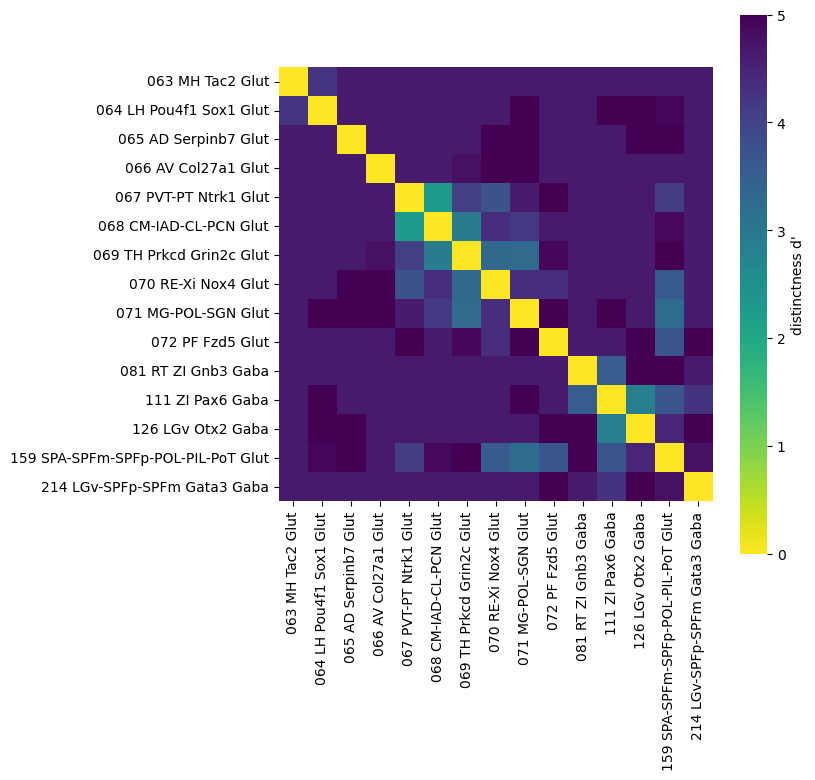

In [95]:
plt.figure(figsize=(7,7))
sns.heatmap(result, cmap='viridis_r', vmin=0, vmax=5, cbar=True, cbar_kws=dict(label="distinctness d'"))
plt.axis('image')

In [99]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

X = squareform(result.values)
Z = hierarchy.linkage(X, method='single')
order = hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(Z, X))

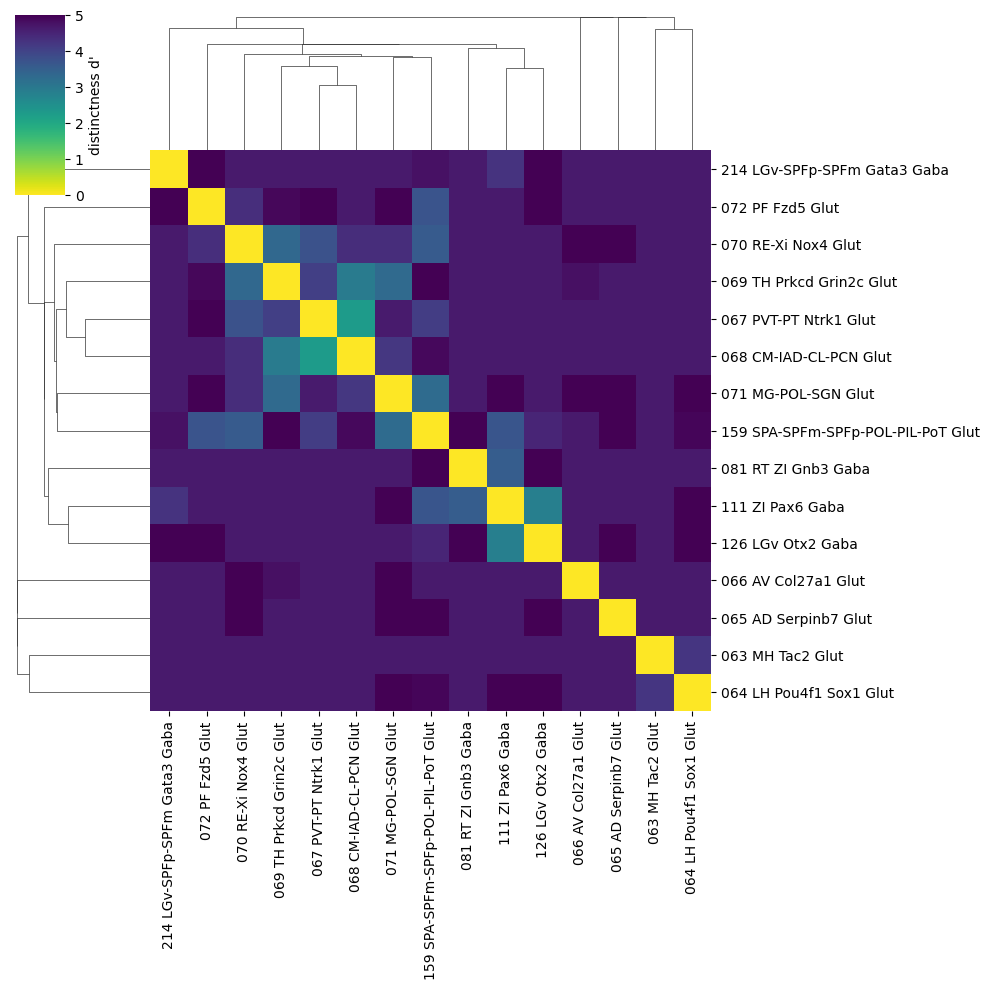

In [100]:
sns.clustermap(result, row_linkage=Z, col_linkage=Z, cmap='viridis_r', vmin=0, vmax=5, cbar=True, cbar_kws=dict(label="distinctness d'"))
# plt.axis('image')

(0.0, 15.0, 15.0, 0.0)

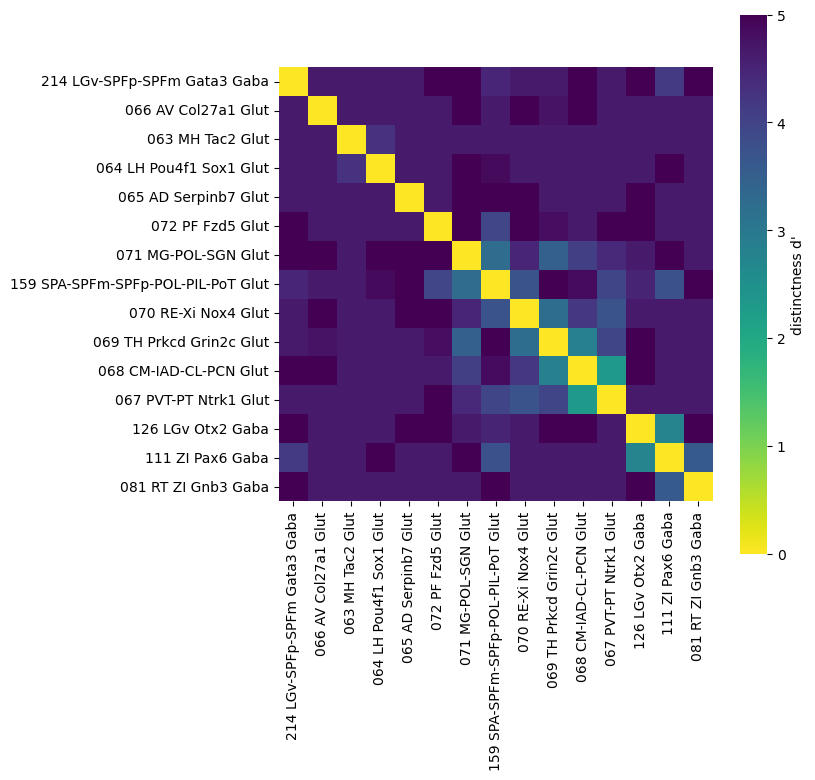

In [65]:
plt.figure(figsize=(7,7))
sns.heatmap(dprime.iloc[order, order], cmap='viridis_r', vmin=0, vmax=5, cbar=True, cbar_kws=dict(label="distinctness d'"))
plt.axis('image')

In [31]:
bold = ['AD Serpinb7 Glut',
 'AV Col27a1 Glut',
 'TH Prkcd Grin2c Glut 9 (AM)',
 'TH Prkcd Grin2c Glut 13 (VM/VAL)',
 'TH Prkcd Grin2c Glut 10 (MD)',
        ]

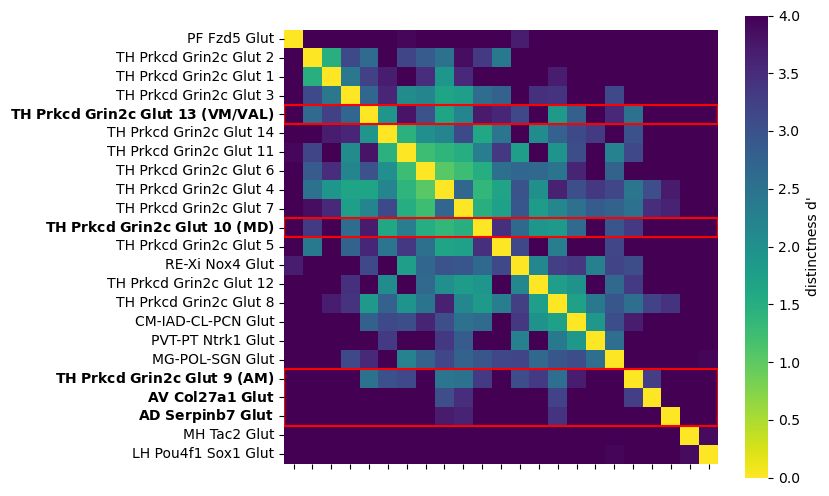

In [34]:
Z = hierarchy.linkage(X, method='single')
order = hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(Z, X))

plt.figure(figsize=(7,6))
sns.heatmap(dprime.iloc[order, order], cmap='viridis_r', vmin=0, vmax=4, cbar=True, cbar_kws=dict(label="distinctness d'"))
plt.axis('image')
plt.xticks

ax = plt.gca()
from matplotlib.patches import Rectangle
args = dict(linewidth=1.5, edgecolor='red', facecolor='none')
k = dprime.shape[0]
boxes = [
    ax.add_patch(Rectangle((0,4), k, 1, **args)),
    ax.add_patch(Rectangle((0,10), k, 1, **args)),
    ax.add_patch(Rectangle((0,18), k, 3, **args)),
]
labels = dprime.index[order]
labels = [r"$\mathbf{" + x.replace(' ', '\ ') + "}$" if x in bold else x for x in labels]
ax.set_yticklabels(labels)
ax.tick_params(labelbottom=False) 
plt.show()

In [51]:
types = ["277 TH Prkcd Grin2c Glut_3",
         "280 TH Prkcd Grin2c Glut_6"
        ]

In [30]:
facs_dprime = tx_dprime(seqData, cluster_label='supertype_id_label', type_list=types, zero_inflated=False, r=1)

0


In [31]:
facs_dprime

,277 TH Prkcd Grin2c Glut_3,280 TH Prkcd Grin2c Glut_6
277 TH Prkcd Grin2c Glut_3,0.000000,3.702156
280 TH Prkcd Grin2c Glut_6,3.702156,0.000000


In [54]:
# higher r / lower dispersion
tx_dprime(seqData, cluster_label='supertype_id_label', type_list=types, zero_inflated=False, r=10)

0


,277 TH Prkcd Grin2c Glut_3,280 TH Prkcd Grin2c Glut_6
277 TH Prkcd Grin2c Glut_3,0.000000,3.811872
280 TH Prkcd Grin2c Glut_6,3.811872,0.000000


In [32]:
tx_dprime(seqData, cluster_label='supertype_id_label', features=seqData.var_names[:10000], type_list=types, zero_inflated=False, r=1)

0


,277 TH Prkcd Grin2c Glut_3,280 TH Prkcd Grin2c Glut_6
277 TH Prkcd Grin2c Glut_3,0.000000,3.464626
280 TH Prkcd Grin2c Glut_6,3.464626,0.000000


In [41]:
sc.pp.highly_variable_genes(seqData, flavor='seurat_v3', n_top_genes=10000)

/opt/conda/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [42]:
tx_dprime(seqData, cluster_label='supertype_id_label', features=seqData.var.query('highly_variable').index, type_list=types, zero_inflated=False, r=1)

0


,277 TH Prkcd Grin2c Glut_3,280 TH Prkcd Grin2c Glut_6
277 TH Prkcd Grin2c Glut_3,0.000000,3.535094
280 TH Prkcd Grin2c Glut_6,3.535094,0.000000


In [43]:
hvg = sc.experimental.pp.highly_variable_genes(seqData, n_top_genes=10000, inplace=False)

/opt/conda/lib/python3.9/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:73: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


In [45]:
tx_dprime(seqData, cluster_label='supertype_id_label', features=hvg.query('highly_variable').index, type_list=types, zero_inflated=False, r=1)

0


,277 TH Prkcd Grin2c Glut_3,280 TH Prkcd Grin2c Glut_6
277 TH Prkcd Grin2c Glut_3,0.000000,3.219919
280 TH Prkcd Grin2c Glut_6,3.219919,0.000000
